In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import itertools
import corner
import APL1_functions as AC

In [2]:

# Aspect ratios at different alphas for targets at [10, 15, 20, 25, 30]
aspect_ratios_5e4 = [np.float64(0.09831616565112951), np.float64(0.10327121349007279), np.float64(0.10706065687504354), np.float64(0.11017255234169927), np.float64(0.11283746999727927)]
aspect_ratios_1e4 = [np.float64(0.0983113322886335), np.float64(0.10326955210011893), np.float64(0.10705984330745438), np.float64(0.11017208974059205), np.float64(0.11283714525084576)]
aspect_ratios_5e3 = [np.float64(0.09837673192155198), np.float64(0.10329059228112623), np.float64(0.10706972458054723), np.float64(0.11017786395168641), np.float64(0.11284107521918753)]
aspect_ratios_1e3 = [np.float64(0.09832232359412532), np.float64(0.10327331738297928), np.float64(0.10706164164920995), np.float64(0.1101731464252775), np.float64(0.11283786599310776)]

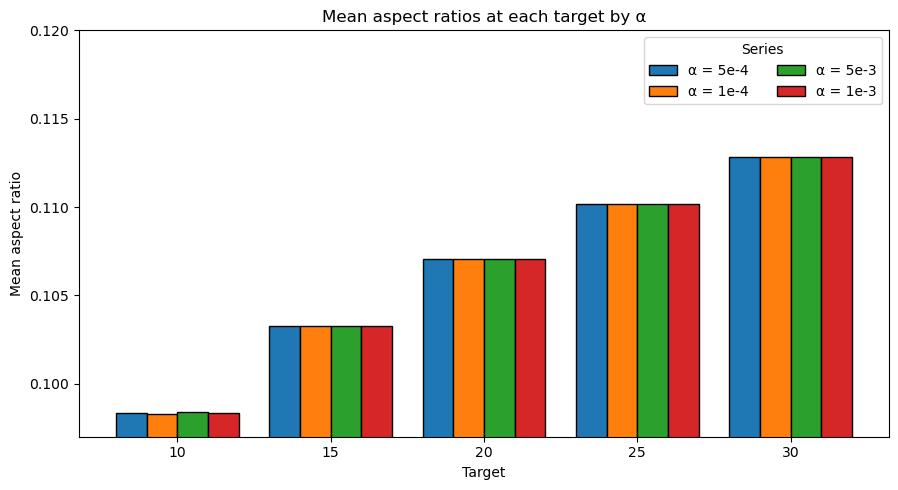

In [3]:


targets = np.array([10, 15, 20, 25, 30])
series = [
    (r'α = 5e-4', aspect_ratios_5e4),
    (r'α = 1e-4', aspect_ratios_1e4),
    (r'α = 5e-3', aspect_ratios_5e3),
    (r'α = 1e-3', aspect_ratios_1e3),
]

x = np.arange(len(targets))
n = len(series)
width = 0.8 / n  # total bar pack width ~0.8

plt.figure(figsize=(9,5))
for i, (label, vals) in enumerate(series):
    offset = (i - (n-1)/2) * width
    plt.bar(x + offset, vals, width=width, edgecolor='k', label=label)

plt.xticks(x, targets)
plt.xlabel('Target')
plt.ylabel('Mean aspect ratio')
plt.title('Mean aspect ratios at each target by α')
plt.legend(title='Series', ncol=2)
plt.tight_layout()
plt.ylim(.097,.12)
plt.show()


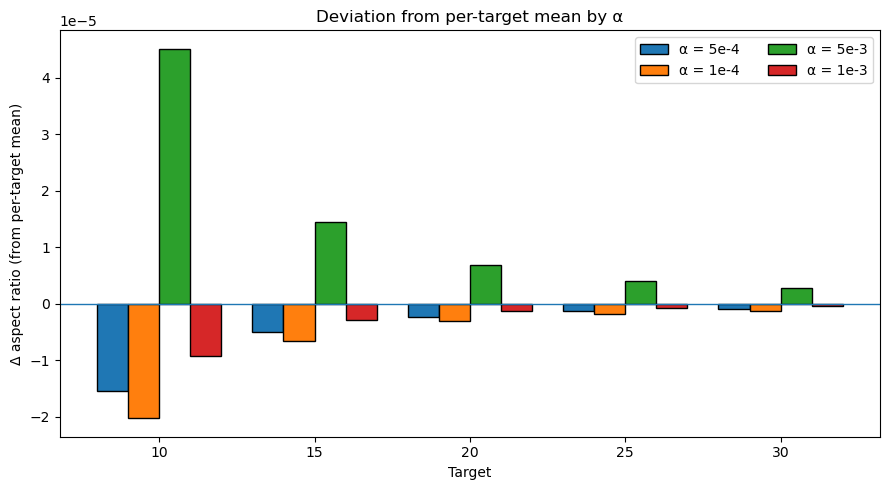

In [4]:
arr = np.vstack([s[1] for s in series])          # shape (4, 5)
grand_mean = arr.mean(axis=0, keepdims=True)     # per-target mean across α
deltas = arr - grand_mean                        # deviations

plt.figure(figsize=(9,5))
for i, (label, _) in enumerate(series):
    offset = (i - (n-1)/2) * width
    plt.bar(x + offset, deltas[i], width=width, edgecolor='k', label=label)
plt.axhline(0, linewidth=1)
plt.xticks(x, targets)
plt.xlabel('Target')
plt.ylabel('Δ aspect ratio (from per-target mean)')
plt.title('Deviation from per-target mean by α')
plt.legend(ncol=2)
plt.tight_layout()
plt.show()


In [5]:
aspect_ratio_5e4 = aspect_ratios_5e4[0]
aspect_ratio_1e4 = aspect_ratios_1e4[0]
aspect_ratio_5e3 = aspect_ratios_5e3[0]
aspect_ratio_1e3 = aspect_ratios_1e3[0]

print(aspect_ratio_5e4)
print(aspect_ratio_1e4)
print(aspect_ratio_5e3)
print(aspect_ratio_1e3)

0.09831616565112951
0.0983113322886335
0.09837673192155198
0.09832232359412532


Aspect Ratio:

$\frac{H}{r}$

Equation for Reynolds Number:

$\mathfrak{R}$ = $\alpha_\nu^{-1}*(\frac{r}{H})^{2}$


In [6]:
def Reynolds(alpha, aspect_ratio):
    return (aspect_ratio**(-2)) / (alpha)

In [7]:
Reynolds_5e4 = (aspect_ratio_5e4**(-2)) / (5*10**(-4))
Reynolds_1e4 = (aspect_ratio_1e4**(-2)) / (1*10**(-4))
Reynolds_5e3 = (aspect_ratio_5e3**(-2)) / (5*10**(-3))
Reynolds_1e3 = (aspect_ratio_1e3**(-2)) / (1*10**(-3))


In [8]:
print(Reynolds_5e4)
print(Reynolds_1e4)
print(Reynolds_5e3)
print(Reynolds_1e3)

206909.35666626558
1034648.5104145535
20665.46649279972
103441.71997253466


In [9]:
df = pd.read_csv("C:\\Users\\casey\\UnigeMasters\\Astrophysics_Lab_Disc_Truncation\\Databases\\C1.csv", header=[0,1,2])

In [10]:
display(df['Circumprimary'])

0.1                    0.2                    0.3              \
           R     b     c          R     b     c          R     b     c   
0    10000.0 -0.66  0.84    10000.0 -0.72  0.88    10000.0 -0.76  0.92   
1   100000.0 -0.75  0.68   100000.0 -0.78  0.72   100000.0 -0.80  0.75   
2  1000000.0 -0.78  0.56  1000000.0 -0.80  0.60  1000000.0 -0.81  0.63   

         0.4                    0.5              
           R     b     c          R     b     c  
0    10000.0 -0.77  0.95    10000.0 -0.78  0.94  
1   100000.0 -0.81  0.78   100000.0 -0.81  0.78  
2  1000000.0 -0.82  0.66  1000000.0 -0.82  0.66

In [11]:

alpha = [5e-4, 1e-4, 5e-3]
aspect_ratio = np.mean([aspect_ratio_5e4, aspect_ratio_1e4, aspect_ratio_5e3])



Re = AC.Reynolds(alpha, aspect_ratio)

print(Re)


known_mu = [0.1, 0.2, 0.3, 0.4, 0.5]

b = []
c = []
R = df['Circumprimary']['0.1']['R']
for ii in range(len(known_mu)):
    bs = df['Circumprimary'][str(known_mu[ii])]['b']
    cs = df['Circumprimary'][str(known_mu[ii])]['c']
    b.append(bs)
    c.append(cs)
    


index = [0, 1, 2, 3, 4]
points = AC.make_pts(b, c, index[0])

print("matrix of points is: " + str(points))
print('')
print("row of points is: " + str(points[0]))
print('')
print("b is: " + str(points[0][0]))



[np.float64(206831.18442558174), np.float64(1034155.9221279087), np.float64(20683.118442558174)]
matrix of points is: [[-6.6e-01  8.4e-01  1.0e+04]
 [-7.5e-01  6.8e-01  1.0e+05]
 [-7.8e-01  5.6e-01  1.0e+06]]

row of points is: [-6.6e-01  8.4e-01  1.0e+04]

b is: -0.66


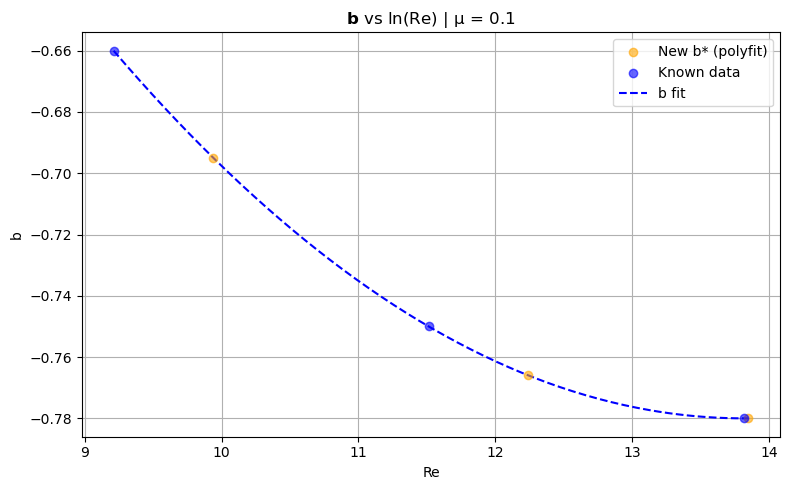

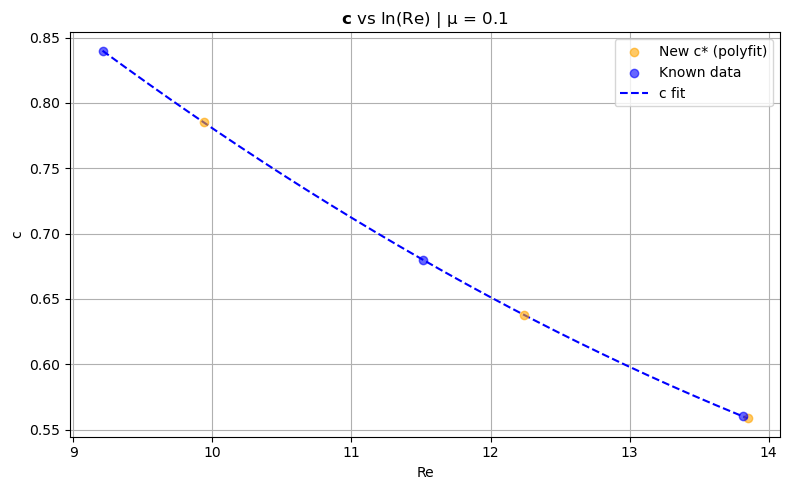

(['At μ_index=0 (μ≈0.1), Re=206831.18442558174: b = -0.7659 ± 0.0000', 'At μ_index=0 (μ≈0.1), Re=1034155.9221279087: b = -0.7800 ± 0.0000', 'At μ_index=0 (μ≈0.1), Re=20683.118442558174: b = -0.6949 ± 0.0000'], ['At μ_index=0 (μ≈0.1), Re=206831.18442558174: c = 0.6378 ± 0.0000', 'At μ_index=0 (μ≈0.1), Re=1034155.9221279087: c = 0.5585 ± 0.0000', 'At μ_index=0 (μ≈0.1), Re=20683.118442558174: c = 0.7852 ± 0.0000'])


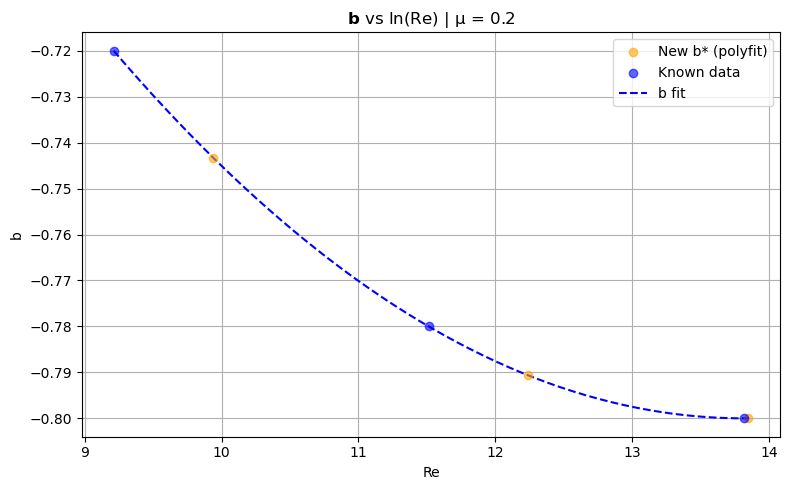

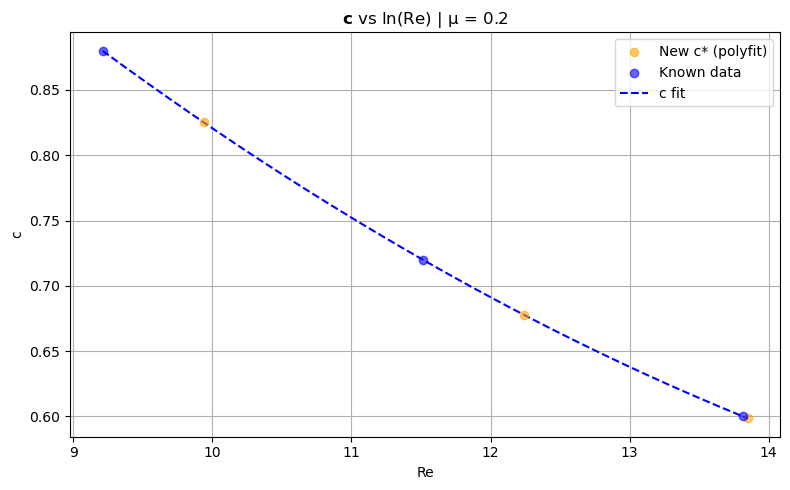

(['At μ_index=1 (μ≈0.2), Re=206831.18442558174: b = -0.7906 ± 0.0000', 'At μ_index=1 (μ≈0.2), Re=1034155.9221279087: b = -0.8000 ± 0.0000', 'At μ_index=1 (μ≈0.2), Re=20683.118442558174: b = -0.7433 ± 0.0000'], ['At μ_index=1 (μ≈0.2), Re=206831.18442558174: c = 0.6778 ± 0.0000', 'At μ_index=1 (μ≈0.2), Re=1034155.9221279087: c = 0.5985 ± 0.0000', 'At μ_index=1 (μ≈0.2), Re=20683.118442558174: c = 0.8252 ± 0.0000'])


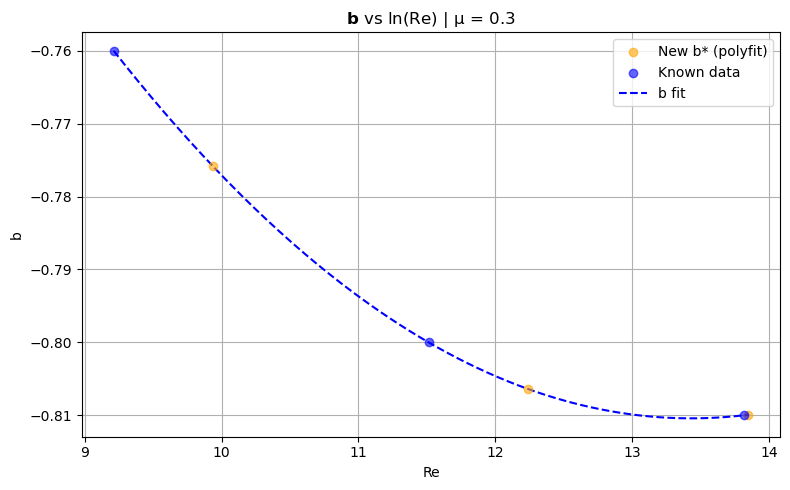

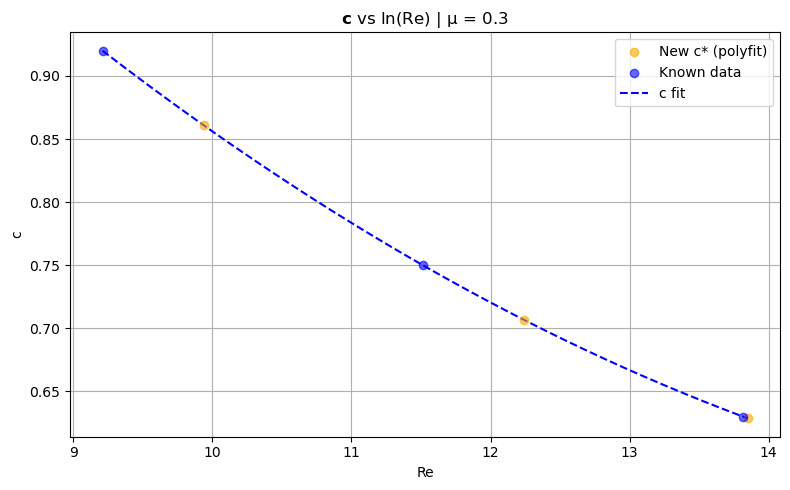

(['At μ_index=2 (μ≈0.3), Re=206831.18442558174: b = -0.8064 ± 0.0000', 'At μ_index=2 (μ≈0.3), Re=1034155.9221279087: b = -0.8099 ± 0.0000', 'At μ_index=2 (μ≈0.3), Re=20683.118442558174: b = -0.7759 ± 0.0000'], ['At μ_index=2 (μ≈0.3), Re=206831.18442558174: c = 0.7067 ± 0.0000', 'At μ_index=2 (μ≈0.3), Re=1034155.9221279087: c = 0.6286 ± 0.0000', 'At μ_index=2 (μ≈0.3), Re=20683.118442558174: c = 0.8609 ± 0.0000'])


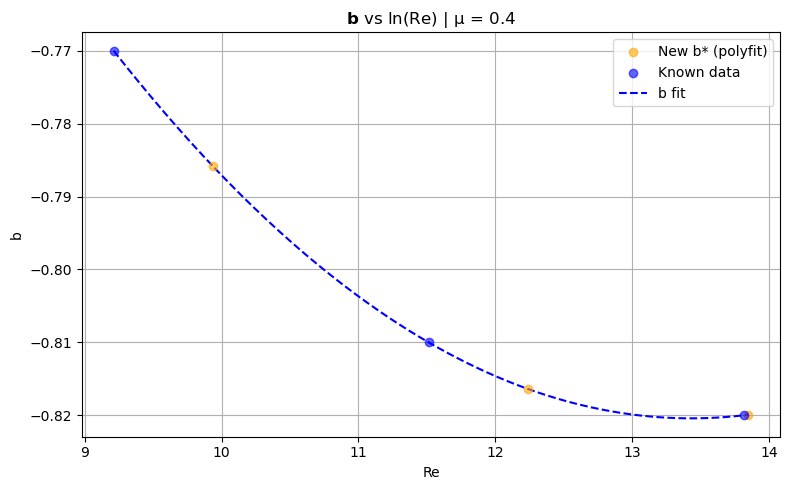

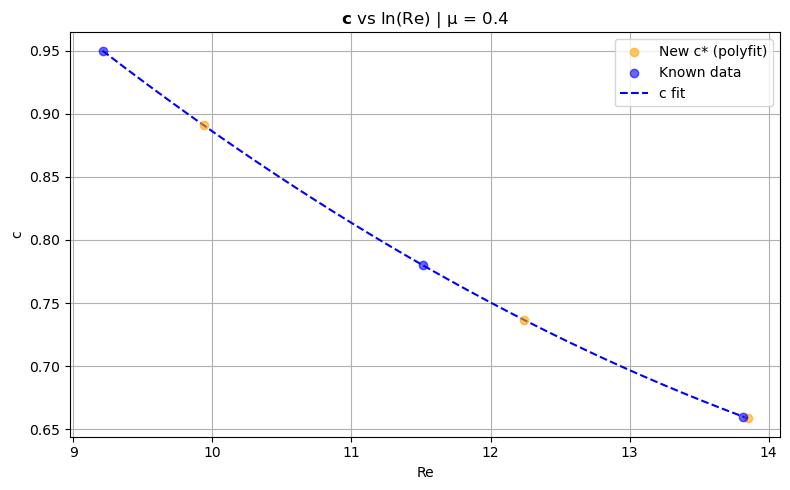

(['At μ_index=3 (μ≈0.4), Re=206831.18442558174: b = -0.8164 ± 0.0000', 'At μ_index=3 (μ≈0.4), Re=1034155.9221279087: b = -0.8199 ± 0.0000', 'At μ_index=3 (μ≈0.4), Re=20683.118442558174: b = -0.7859 ± 0.0000'], ['At μ_index=3 (μ≈0.4), Re=206831.18442558174: c = 0.7367 ± 0.0000', 'At μ_index=3 (μ≈0.4), Re=1034155.9221279087: c = 0.6586 ± 0.0000', 'At μ_index=3 (μ≈0.4), Re=20683.118442558174: c = 0.8909 ± 0.0000'])


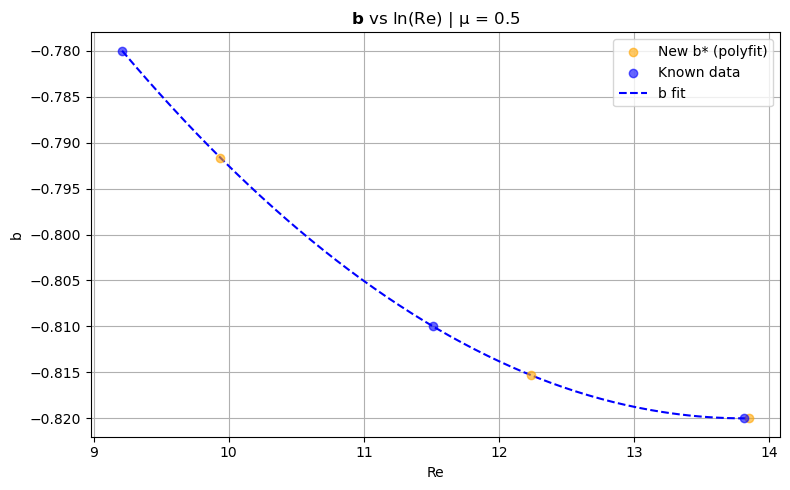

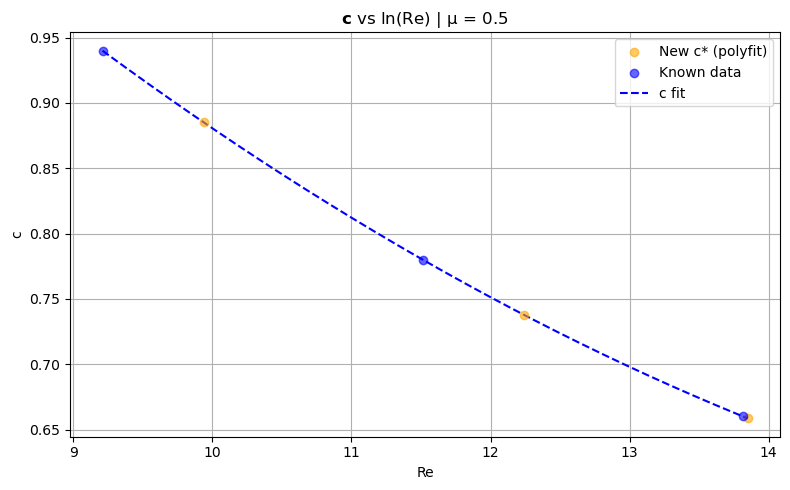

(['At μ_index=4 (μ≈0.5), Re=206831.18442558174: b = -0.8153 ± 0.0000', 'At μ_index=4 (μ≈0.5), Re=1034155.9221279087: b = -0.8200 ± 0.0000', 'At μ_index=4 (μ≈0.5), Re=20683.118442558174: b = -0.7916 ± 0.0000'], ['At μ_index=4 (μ≈0.5), Re=206831.18442558174: c = 0.7378 ± 0.0000', 'At μ_index=4 (μ≈0.5), Re=1034155.9221279087: c = 0.6585 ± 0.0000', 'At μ_index=4 (μ≈0.5), Re=20683.118442558174: c = 0.8852 ± 0.0000'])


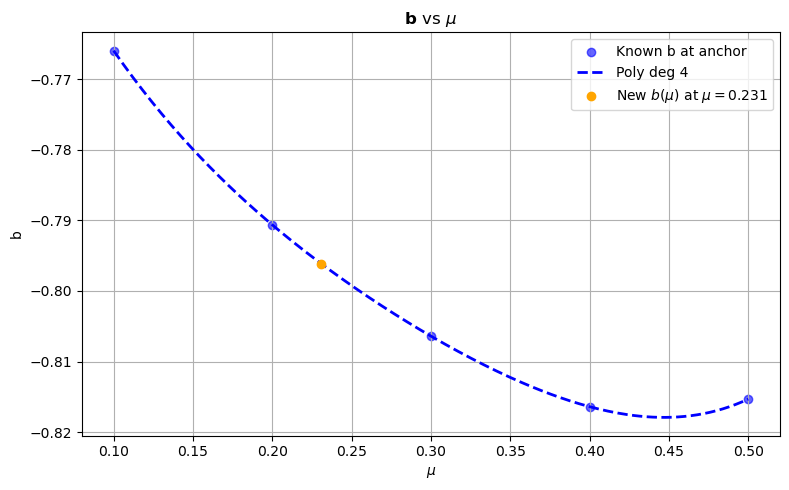

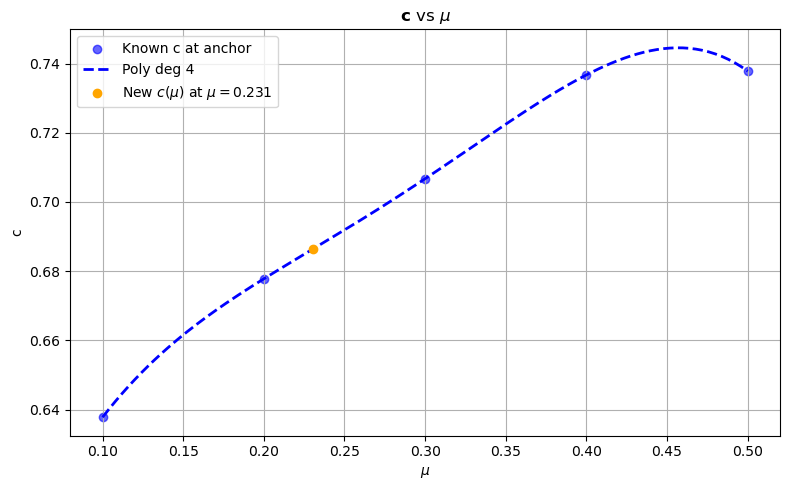

(['Computed μ from masses: μ = 0.2308  →  b(μ) = -0.7962 ± 0.0000 for Re = 1e+04)'], ['Computed μ from masses: μ = 0.2308  →  c(μ) = 0.6868 ± 0.0000 for Re = 1e+04)'])


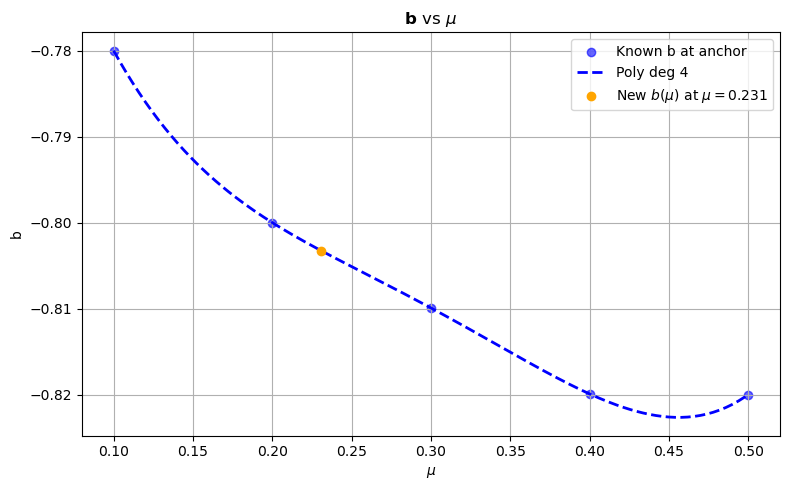

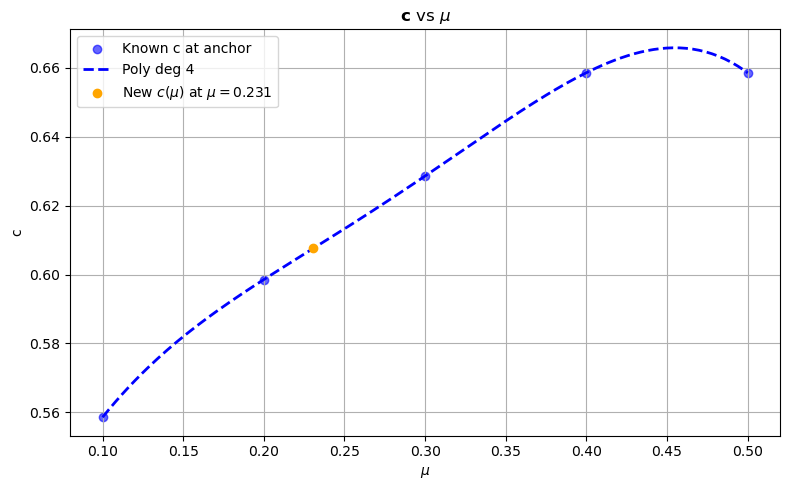

(['Computed μ from masses: μ = 0.2308  →  b(μ) = -0.8034 ± 0.0000 for Re = 1e+05)'], ['Computed μ from masses: μ = 0.2308  →  c(μ) = 0.6079 ± 0.0000 for Re = 1e+05)'])


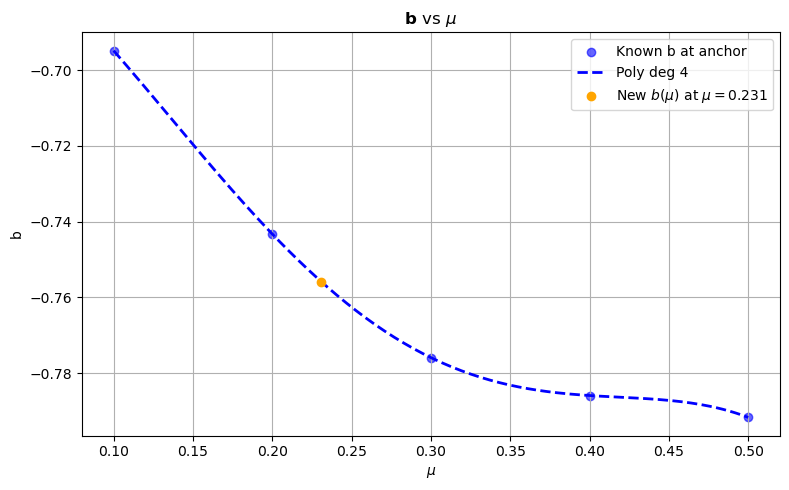

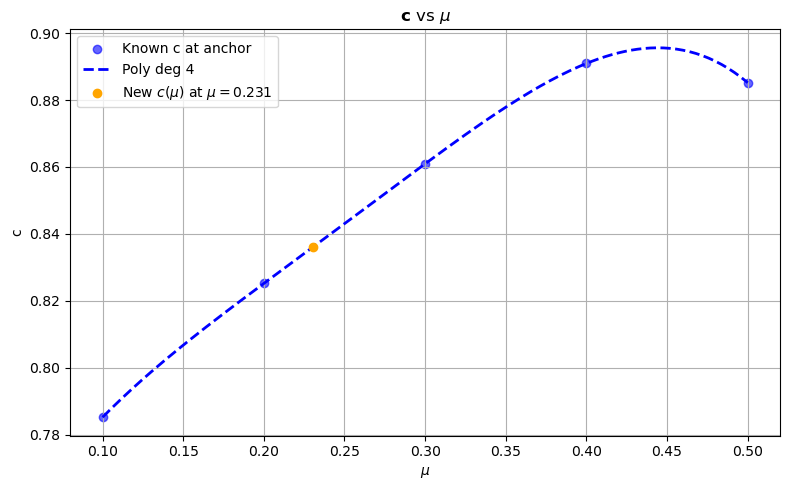

(['Computed μ from masses: μ = 0.2308  →  b(μ) = -0.7556 ± 0.0000 for Re = 1e+06)'], ['Computed μ from masses: μ = 0.2308  →  c(μ) = 0.8363 ± 0.0000 for Re = 1e+06)'])


In [12]:
AC.find_and_plot_new_bc_points_re_and_mu(b, c,index[0],Re,Re_fit=True, Mu_fit=False,plotting=True)
print(AC.show_me_new_points(b, c, index[0], Re, M1=1.0, M2=0.3,print_mu=False, print_Re=True))

AC.find_and_plot_new_bc_points_re_and_mu(b, c,index[1],Re,Re_fit=True, Mu_fit=False,plotting=True)
print(AC.show_me_new_points(b, c, index[1], Re, M1=1.0, M2=0.3,print_mu=False, print_Re=True))

AC.find_and_plot_new_bc_points_re_and_mu(b, c,index[2],Re,Re_fit=True, Mu_fit=False,plotting=True)
print(AC.show_me_new_points(b, c, index[2], Re, M1=1.0, M2=0.3,print_mu=False, print_Re=True))

AC.find_and_plot_new_bc_points_re_and_mu(b, c,index[3],Re,Re_fit=True, Mu_fit=False,plotting=True)
print(AC.show_me_new_points(b, c, index[3], Re, M1=1.0, M2=0.3,print_mu=False, print_Re=True))

AC.find_and_plot_new_bc_points_re_and_mu(b, c,index[4],Re,Re_fit=True, Mu_fit=False,plotting=True)
print(AC.show_me_new_points(b, c, index[4], Re, M1=1.0, M2=0.3,print_mu=False, print_Re=True))

AC.find_and_plot_new_bc_points_re_and_mu(b, c,mu_indices=[0,1,2,3,4],R_targets=Re,Re_fit=False, Mu_fit=True,M1=1.0, M2=0.3,re_idx=0, deg_mu=4,plotting=True)
print(AC.show_me_new_points(b, c, index, Re, M1=1.0, M2=0.3,print_mu=True, re_idx=0, print_Re=False))

AC.find_and_plot_new_bc_points_re_and_mu(b, c,mu_indices=[0,1,2,3,4],R_targets=Re,Re_fit=False, Mu_fit=True,M1=1.0, M2=0.3,re_idx=1, deg_mu=4,plotting=True)
print(AC.show_me_new_points(b, c, index, Re, M1=1.0, M2=0.3,print_mu=True, re_idx=1, print_Re=False))

AC.find_and_plot_new_bc_points_re_and_mu(b, c,mu_indices=[0,1,2,3,4],R_targets=Re,Re_fit=False, Mu_fit=True,M1=1.0, M2=0.3,re_idx=2, deg_mu=4,plotting=True)
print(AC.show_me_new_points(b, c, index, Re, M1=1.0, M2=0.3,print_mu=True, re_idx=2, print_Re=False))

$R_{trunc} (M1, M2, e, a) = R_{egg,i}*(b*e^{c} + 0.88*\mu^{0.01}) $

the truncation radius of the primary star for a given mu = 0.41420118343195267 and given Reynolds number Re = 10000.0 is [1.14439718]
the truncation radius  of the secondary star for a given mu = 0.41420118343195267 and given Reynolds number Re = 10000.0 is [0.97685991]


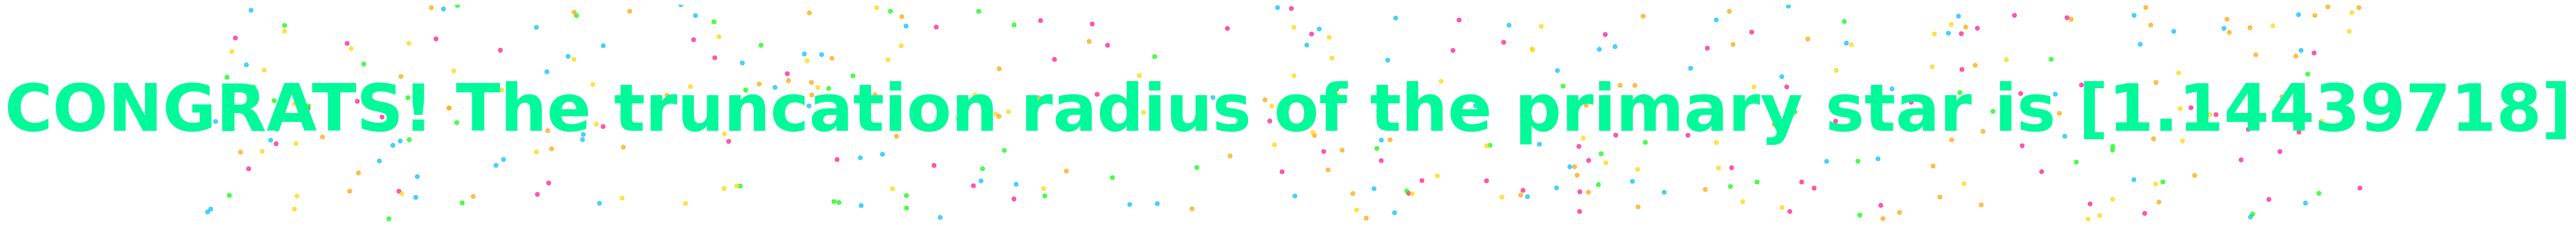

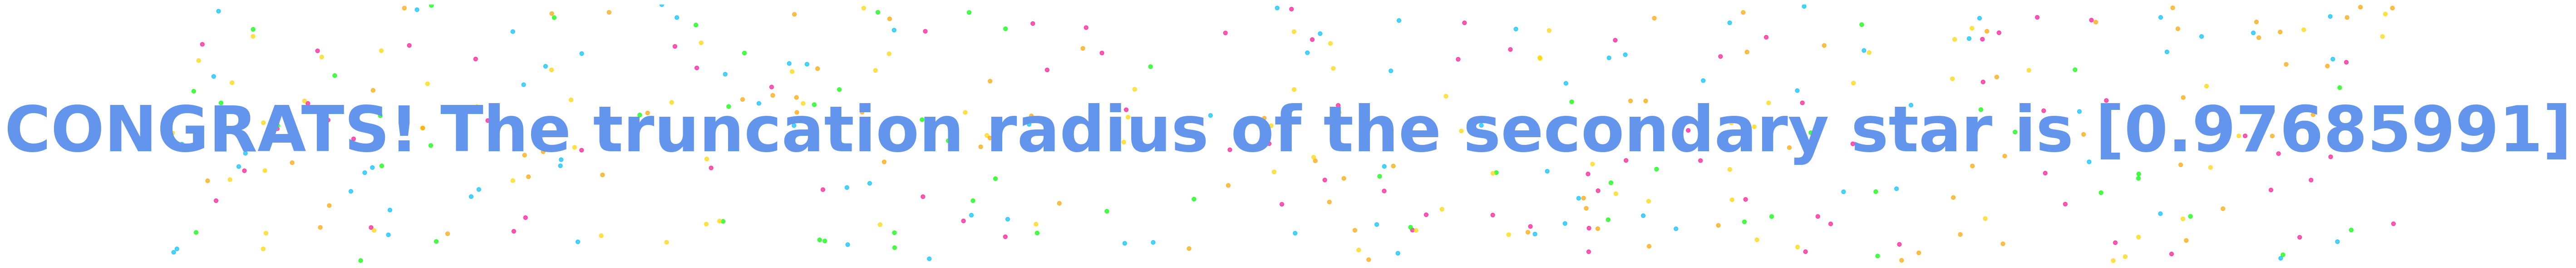

(array([1.14439718]), array([0.97685991]))

In [13]:
df = pd.read_csv("C:\\Users\\casey\\UnigeMasters\\Astrophysics_Lab_Disc_Truncation\\Databases\\C1.csv", header=[0,1,2])

alpha = [5e-4, 1e-4, 5e-3, 1e-3]
aspect_ratio = np.mean([aspect_ratio_5e4, aspect_ratio_1e4, aspect_ratio_5e3, aspect_ratio_1e3])

known_mu = [0.1, 0.2, 0.3, 0.4, 0.5]

M1=.99 # Mass of star 1 in solar masses
M2=.7 # Mass of Star 2 in solar masses
e=.31 # Eccentricity of system
abin=5.3 # Semi-major Axis of system
# Re = AC.Reynolds(alpha, aspect_ratio) # Target Reynolds numbers calculated from given alpha and aspect ratio

b = [] # values of b from table
c = [] # values of c from table
R = df['Circumprimary']['0.1']['R']
for ii in range(len(known_mu)):
    bs = df['Circumprimary'][str(known_mu[ii])]['b']
    cs = df['Circumprimary'][str(known_mu[ii])]['c']
    b.append(bs)
    c.append(cs)
    

AC.truncation_radius(alpha, aspect_ratio, M1,M2,e,abin,b,c, re_idx=0, plotting=True)

In [14]:
# give alpha as an input for the truncation radius function (DONE)
# Print both radius around primary and radius around the secondary (Done)
# Dependencae of truncation on the mass ratio, same with other parameters as well

the truncation radius of the primary star for a given mu = 0.41420118343195267 and given Reynolds number Re = 10000.0 is [1.14439718]
the truncation radius  of the secondary star for a given mu = 0.41420118343195267 and given Reynolds number Re = 10000.0 is [0.97685991]


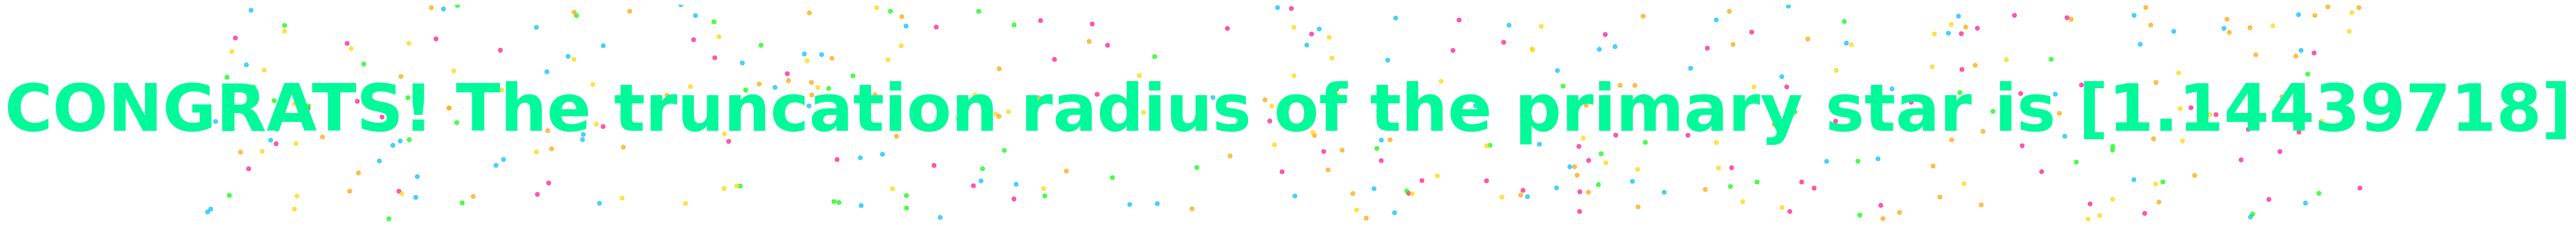

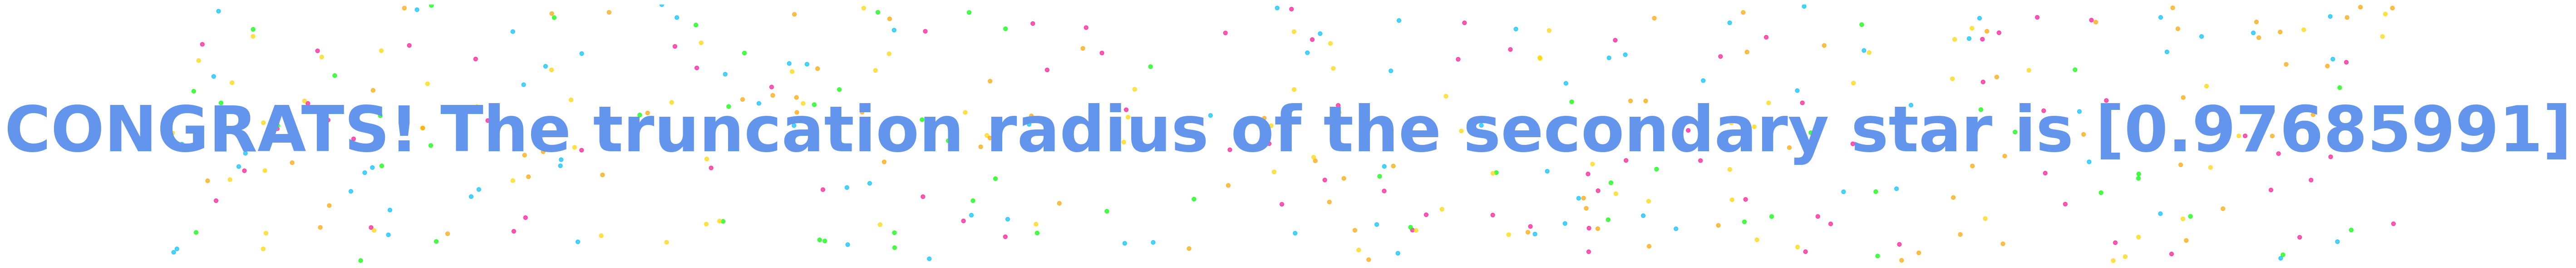

In [29]:
'''
For the following plots, all variables are kept unchanged except for truncation radius and a variable we are testing (i.e. Truncation radius vs Eccentricity)
The following are the constants:
M1 = 0.99
M2 = 0.7
e = 0.31
abin = 5.3
re_idx = 10000
trunc_prim = 1.14439718
trunc_sec = 0.97685991
'''


M1=.99 # Mass of star 1 in solar masses
M2=.7 # Mass of Star 2 in solar masses
e=.31 # Eccentricity of system
abin=5.3 # Semi-major Axis of system
alpha1=[5e-4]

trunc_prim, trunc_sec = AC.truncation_radius(alpha1, aspect_ratio, M1,M2,e,abin,b,c, re_idx=0, plotting=True)




In [58]:
# Plot Truncation Radius vs Eccentricity
M1=.99 # Mass of star 1 in solar masses
M2=.7 # Mass of Star 2 in solar masses
e=.31 # Eccentricity of system
abin=5.3 # Semi-major Axis of system
alpha1=[5e-4]


e_dependence = np.linspace(0, 1, 100)

trunc_primary_e_dep = []
trunc_secondary_e_dep = []
for ii in range(len(e_dependence)):
    trunc_prim, trunc_sec = AC.truncation_radius(alpha, aspect_ratio, M1,M2,e_dependence[ii],abin,b,c, re_idx=0, plotting=False)
    trunc_primary_e_dep.append(trunc_prim)
    trunc_secondary_e_dep.append(trunc_sec)
    
# Plot Truncation Radius vs binary separation 
abin_dependence = np.linspace(0, 100, 100)

trunc_primary_abin_dep = []
trunc_secondary_abin_dep = []
for ii in range(len(abin_dependence)):
    trunc_prim, trunc_sec = AC.truncation_radius(alpha, aspect_ratio, M1,M2,e,abin_dependence[ii],b,c, re_idx=0, plotting=False)
    trunc_primary_abin_dep.append(trunc_prim)
    trunc_secondary_abin_dep.append(trunc_sec)
    
# Plot Truncation Radius vs different values of mu
# Because mu depends on both M1 and M2, we keep M1 fixed and vary M2 by the following equation
# mu*M1/1-mu
mu_vals = np.linspace(1e-5, .49999, 100)
M2_dependence = AC.M2_vary(M1, mu_vals)


trunc_primary_mu_dep = []
trunc_secondary_mu_dep = []
for ii in range(len(M2_dependence)):
    trunc_prim, trunc_sec = AC.truncation_radius(alpha, aspect_ratio, M1,M2_dependence[ii],e,abin,b,c, re_idx=0, plotting=False)
    trunc_primary_mu_dep.append(trunc_prim)
    trunc_secondary_mu_dep.append(trunc_sec)

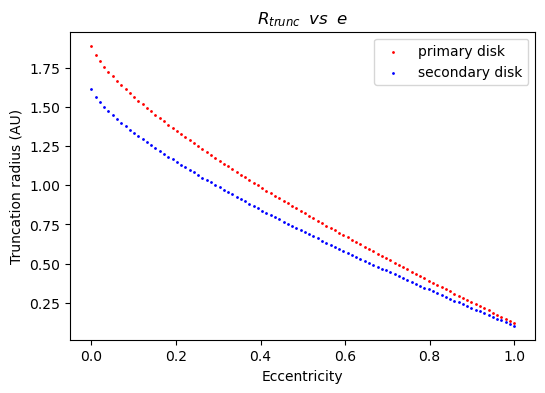

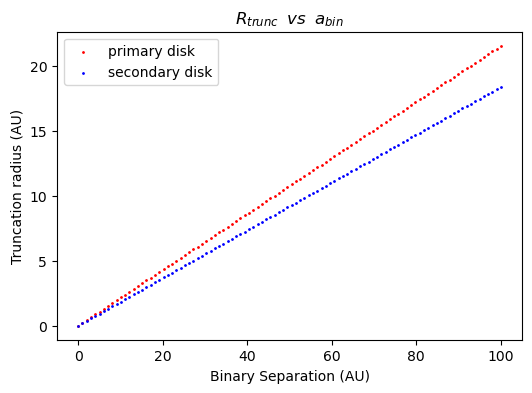

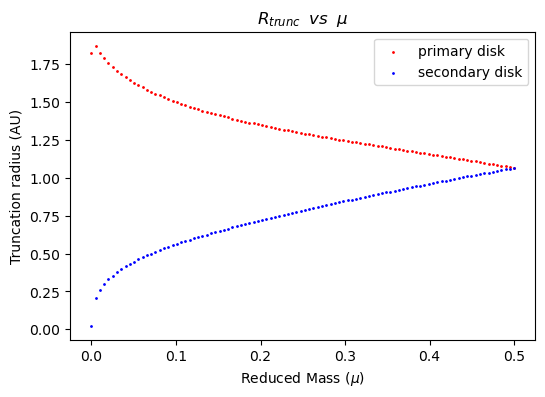

In [59]:
plt.subplots(figsize=(6, 4))
plt.scatter(e_dependence, trunc_primary_e_dep, color='r', s=1, label='primary disk')
plt.scatter(e_dependence, trunc_secondary_e_dep, color='b', s=1, label='secondary disk')
plt.xlabel('Eccentricity')
plt.ylabel('Truncation radius (AU)')
plt.title(r'$R_{trunc}\;\;vs\;\;e$')
plt.legend()

plt.subplots(figsize=(6, 4))
plt.scatter(abin_dependence, trunc_primary_abin_dep, color='r', s=1, label='primary disk')
plt.scatter(abin_dependence, trunc_secondary_abin_dep, color='b', s=1, label='secondary disk')
plt.xlabel('Binary Separation (AU)')
plt.ylabel('Truncation radius (AU)')
plt.title(r'$R_{trunc}\;\;vs\;\;a_{bin}$')
plt.legend()

plt.subplots(figsize=(6, 4))
plt.scatter(mu_vals, trunc_primary_mu_dep, color='r', s=1, label='primary disk')
plt.scatter(mu_vals, trunc_secondary_mu_dep, color='b', s=1, label='secondary disk')
plt.xlabel(r'Reduced Mass ($\mu$)')
plt.ylabel('Truncation radius (AU)')
plt.title(r'$R_{trunc}\;\;vs\;\;\mu$')
plt.legend()

In [32]:
# Plot Truncation Radius vs Eccentricity
e_dependence = np.linspace(0, 1, 100)
abin_dependence = np.linspace(0, 100, 10)

trunc_primary_ea_dep = []
trunc_secondary_ea_dep = []
for ii in range(len(e_dependence)):
    for jj in range(len(abin_dependence)):
        trunc_prim, trunc_sec = AC.truncation_radius(alpha, aspect_ratio, M1,M2,e_dependence[ii],abin_dependence[jj],b,c, re_idx=0, plotting=False)
        trunc_primary_ea_dep.append(trunc_prim)
        trunc_secondary_ea_dep.append(trunc_sec)                    
    

    
# # Plot Truncation Radius vs different values of mu
# # Because mu depends on both M1 and M2, we keep M1 fixed and vary M2 by the following equation
# # mu*M1/1-mu
# mu_vals = np.linspace(1e-5, .49999, 100)
# M2_dependence = AC.M2_vary(M1, mu_vals)



C:\Users\casey\AppData\Local\Temp\ipykernel_27784\3688114633.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  trunc_primary_e_on_a[i, j] = float(np.asarray(tr_p))
C:\Users\casey\AppData\Local\Temp\ipykernel_27784\3688114633.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  trunc_secondary_e_on_a[i, j] = float(np.asarray(tr_s))
C:\Users\casey\AppData\Local\Temp\ipykernel_27784\3688114633.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  trunc_primary_a_on_

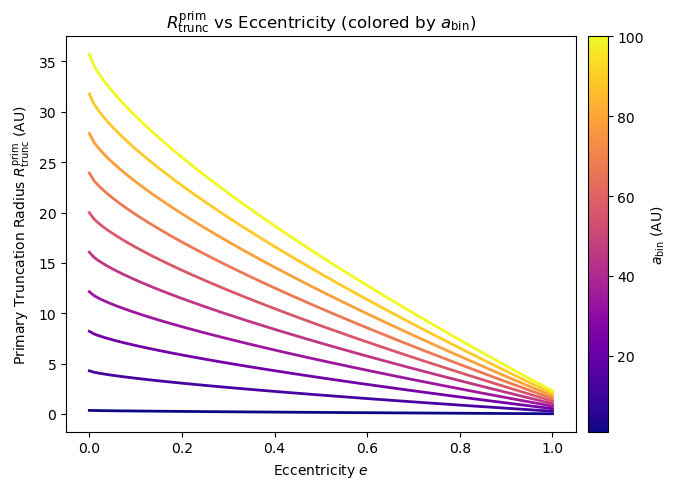

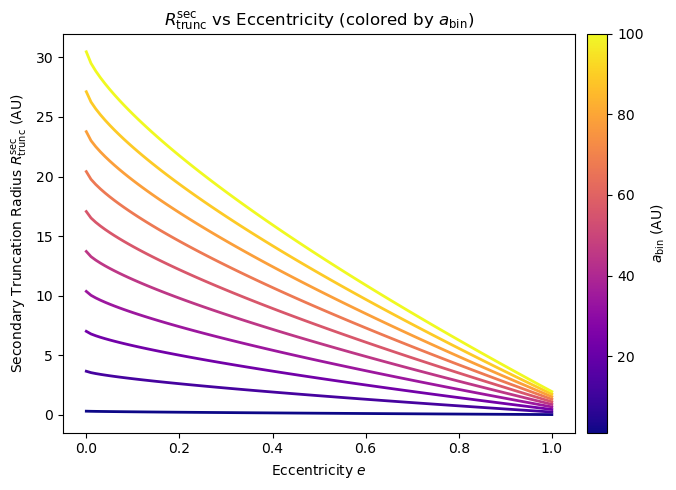

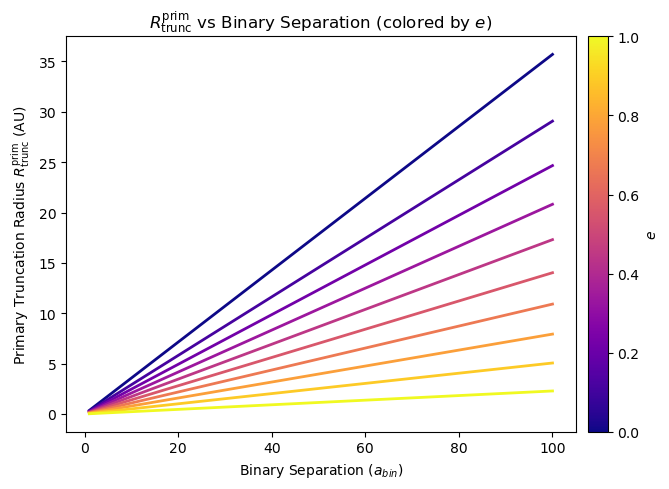

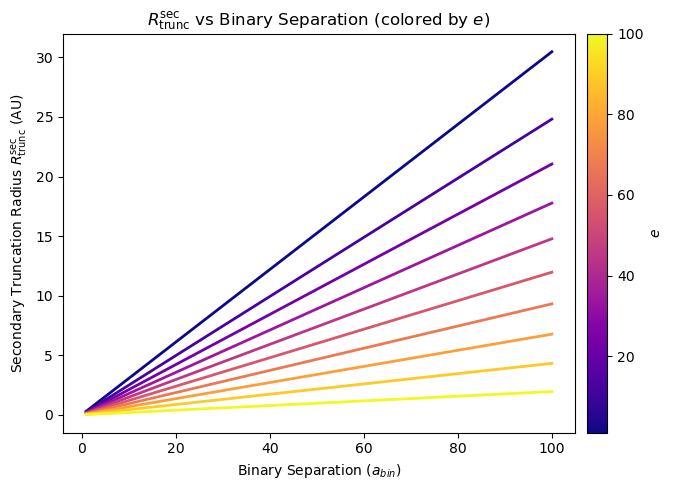

In [60]:

# M1=.99 # Mass of star 1 in solar masses
# M2=.7 # Mass of Star 2 in solar masses
# e=.31 # Eccentricity of system
# abin=5.3 # Semi-major Axis of system
# alpha1=[5e-4]

# --- Parameters ---
e_values_e_on_a = np.linspace(0, 1, 100)
abin_values_e_on_a = np.linspace(1, 100, 10)   # vary as you like (AU)

e_values_a_on_e = np.linspace(0, 1, 10)
abin_values_a_on_e = np.linspace(1, 100, 100)

# trunc vs eccentricity with dependence on abin
trunc_primary_e_on_a = np.zeros((len(abin_values_e_on_a), len(e_values_e_on_a)))
trunc_secondary_e_on_a = np.zeros((len(abin_values_e_on_a), len(e_values_e_on_a)))

# --- Compute truncation radii ---
for i, abin in enumerate(abin_values_e_on_a):
    for j, e in enumerate(e_values_e_on_a):
        tr_p, tr_s = AC.truncation_radius(alpha, aspect_ratio, M1, M2, e, abin, b, c,
                                          re_idx=0, plotting=False)
        trunc_primary_e_on_a[i, j] = float(np.asarray(tr_p))
        trunc_secondary_e_on_a[i, j] = float(np.asarray(tr_s))
        

# trunc vs abin with dependence on eccentricity
trunc_primary_a_on_e = np.zeros((len(e_values_a_on_e), len(abin_values_a_on_e)))
trunc_secondary_a_on_e = np.zeros((len(e_values_a_on_e), len(abin_values_a_on_e)))


# --- Compute truncation radii ---
for i, e in enumerate(e_values_a_on_e):
    for j, abin in enumerate(abin_values_a_on_e):
        tr_p, tr_s = AC.truncation_radius(alpha, aspect_ratio, M1, M2, e, abin, b, c,
                                          re_idx=0, plotting=False)
        trunc_primary_a_on_e[i, j] = float(np.asarray(tr_p))
        trunc_secondary_a_on_e[i, j] = float(np.asarray(tr_s))

# --- Color setup ---
cmap = plt.cm.plasma
norm_e_on_a = plt.Normalize(vmin=abin_values_e_on_a.min(), vmax=abin_values_e_on_a.max())
norm_a_on_e = plt.Normalize(vmin=e_values_a_on_e.min(), vmax=e_values_a_on_e.max())

# --- Primary plot ---
fig, ax = plt.subplots(figsize=(7,5))
for i, abin in enumerate(abin_values_e_on_a):
    color = cmap(norm_e_on_a(abin))
    ax.plot(e_values_e_on_a, trunc_primary_e_on_a[i], color=color, lw=2)
ax.set_xlabel("Eccentricity $e$")
ax.set_ylabel(r"Primary Truncation Radius $R_{\rm trunc}^{\rm prim}$ (AU)")
ax.set_title(r"$R_{\rm trunc}^{\rm prim}$ vs Eccentricity (colored by $a_{\rm bin}$)")
sm = plt.cm.ScalarMappable(norm=norm_e_on_a, cmap=cmap)
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label(r"$a_{\rm bin}$ (AU)")
plt.tight_layout()
plt.show()

# --- Secondary plot ---
fig, ax = plt.subplots(figsize=(7,5))
for i, abin in enumerate(abin_values_e_on_a):
    color = cmap(norm_e_on_a(abin))
    ax.plot(e_values_e_on_a, trunc_secondary_e_on_a[i], color=color, lw=2)
ax.set_xlabel("Eccentricity $e$")
ax.set_ylabel(r"Secondary Truncation Radius $R_{\rm trunc}^{\rm sec}$ (AU)")
ax.set_title(r"$R_{\rm trunc}^{\rm sec}$ vs Eccentricity (colored by $a_{\rm bin}$)")
sm = plt.cm.ScalarMappable(norm=norm_e_on_a, cmap=cmap)
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label(r"$a_{\rm bin}$ (AU)")
plt.tight_layout()
plt.show()

# --- Primary plot ---
fig, ax = plt.subplots(figsize=(7,5))
for i, e in enumerate(e_values_a_on_e):
    color = cmap(norm_a_on_e(e))
    ax.plot(abin_values_a_on_e, trunc_primary_a_on_e[i], color=color, lw=2)
ax.set_xlabel("Binary Separation $(a_{bin})$")
ax.set_ylabel(r"Primary Truncation Radius $R_{\rm trunc}^{\rm prim}$ (AU)")
ax.set_title(r"$R_{\rm trunc}^{\rm prim}$ vs Binary Separation (colored by $e$)")
sm = plt.cm.ScalarMappable(norm=norm_a_on_e, cmap=cmap)
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label(r"$e$")
plt.tight_layout()
plt.show()

# --- Secondary plot ---
fig, ax = plt.subplots(figsize=(7,5))
for i, e in enumerate(e_values_a_on_e):
    color = cmap(norm_a_on_e(e))
    ax.plot(abin_values_a_on_e, trunc_secondary_a_on_e[i], color=color, lw=2)
ax.set_xlabel("Binary Separation $(a_{bin})$")
ax.set_ylabel(r"Secondary Truncation Radius $R_{\rm trunc}^{\rm sec}$ (AU)")
ax.set_title(r"$R_{\rm trunc}^{\rm sec}$ vs Binary Separation (colored by $e$)")
sm = plt.cm.ScalarMappable(norm=norm_e_on_a, cmap=cmap)
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label(r"$e$")
plt.tight_layout()
plt.show()


C:\Users\casey\AppData\Local\Temp\ipykernel_27784\2558478361.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  trunc_primary[i, j] = float(np.asarray(tr_p))
C:\Users\casey\AppData\Local\Temp\ipykernel_27784\2558478361.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  trunc_secondary[i, j] = float(np.asarray(tr_s))


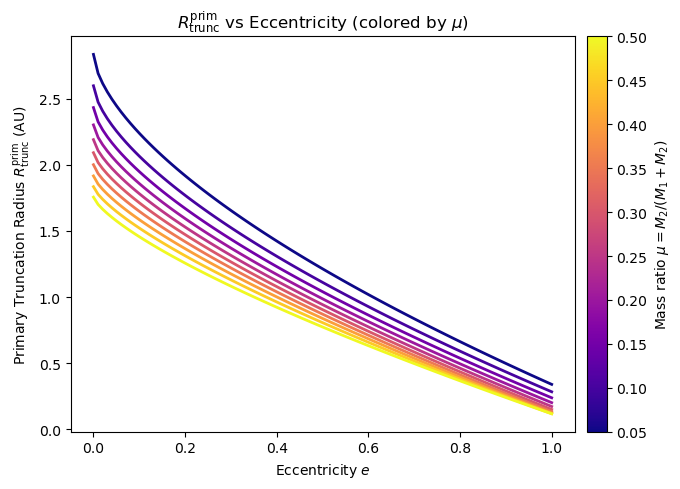

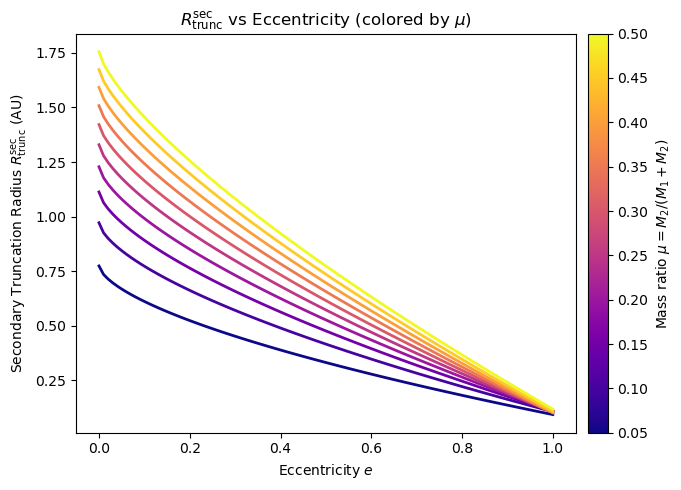

In [61]:
# M1=.99 # Mass of star 1 in solar masses
# M2=.7 # Mass of Star 2 in solar masses
# e=.31 # Eccentricity of system
# abin=5.3 # Semi-major Axis of system
# alpha1=[5e-4]


# --- Parameters ---
e_values = np.linspace(0, 1, 100)       # eccentricity values
mu_values = np.linspace(0.05, 0.5, 10)  # range of mass ratios μ

# --- Storage arrays ---
trunc_primary = np.zeros((len(mu_values), len(e_values)))
trunc_secondary = np.zeros((len(mu_values), len(e_values)))

# --- Compute truncation radii ---
for i, mu in enumerate(mu_values):
    # derive M2 for each mu (keeping M1 fixed)
    M2_var = (mu * M1) / (1 - mu)
    for j, e in enumerate(e_values):
        tr_p, tr_s = AC.truncation_radius(alpha, aspect_ratio, .99, M2_var, e, 5.3, b, c,
                                          re_idx=0, plotting=False)
        trunc_primary[i, j] = float(np.asarray(tr_p))
        trunc_secondary[i, j] = float(np.asarray(tr_s))

# --- Color setup ---
cmap = plt.cm.plasma
norm = plt.Normalize(vmin=mu_values.min(), vmax=mu_values.max())

# --- Primary plot ---
fig, ax = plt.subplots(figsize=(7,5))
for i, mu in enumerate(mu_values):
    color = cmap(norm(mu))
    ax.plot(e_values, trunc_primary[i], color=color, lw=2)
ax.set_xlabel("Eccentricity $e$")
ax.set_ylabel(r"Primary Truncation Radius $R_{\rm trunc}^{\rm prim}$ (AU)")
ax.set_title(r"$R_{\rm trunc}^{\rm prim}$ vs Eccentricity (colored by $\mu$)")
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label(r"Mass ratio $\mu = M_2 / (M_1 + M_2)$")
plt.tight_layout()
plt.show()

# --- Secondary plot ---
fig, ax = plt.subplots(figsize=(7,5))
for i, mu in enumerate(mu_values):
    color = cmap(norm(mu))
    ax.plot(e_values, trunc_secondary[i], color=color, lw=2)
ax.set_xlabel("Eccentricity $e$")
ax.set_ylabel(r"Secondary Truncation Radius $R_{\rm trunc}^{\rm sec}$ (AU)")
ax.set_title(r"$R_{\rm trunc}^{\rm sec}$ vs Eccentricity (colored by $\mu$)")
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label(r"Mass ratio $\mu = M_2 / (M_1 + M_2)$")
plt.tight_layout()
plt.show()


C:\Users\casey\AppData\Local\Temp\ipykernel_27784\3573317630.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  trunc_primary[i, j] = float(np.asarray(tr_p))
C:\Users\casey\AppData\Local\Temp\ipykernel_27784\3573317630.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  trunc_secondary[i, j] = float(np.asarray(tr_s))


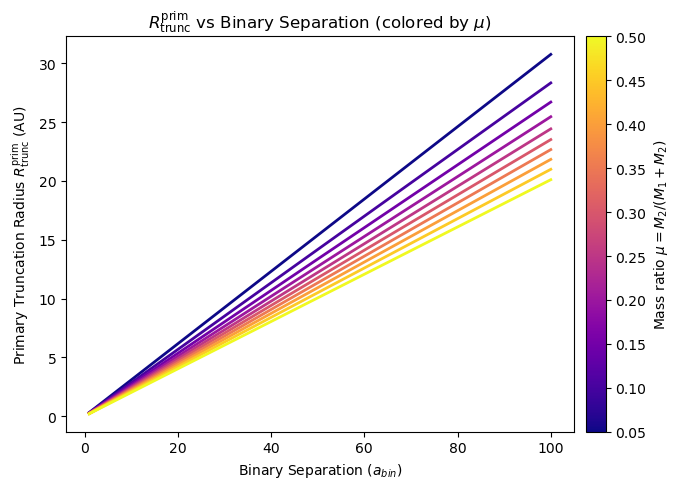

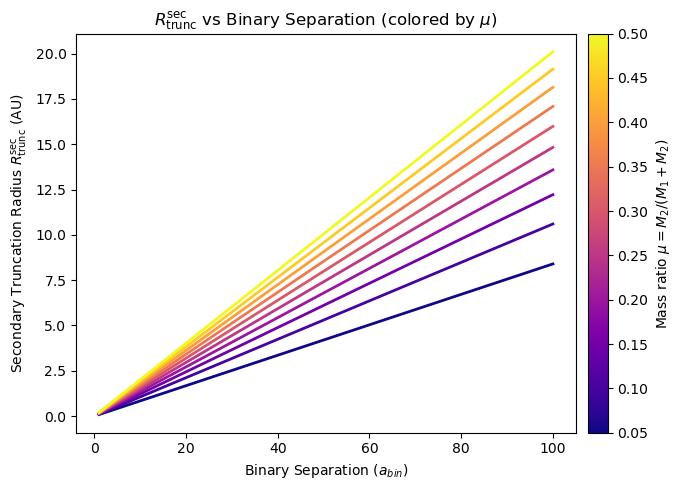

In [62]:
# M1=.99 # Mass of star 1 in solar masses
# M2=.7 # Mass of Star 2 in solar masses
# e=.31 # Eccentricity of system
# abin=5.3 # Semi-major Axis of system
# alpha1=[5e-4]

# --- Parameters ---
abin_values = np.linspace(1, 100, 100)       # eccentricity values
mu_values = np.linspace(0.05, 0.5, 10)  # range of mass ratios μ

# --- Storage arrays ---
trunc_primary = np.zeros((len(mu_values), len(abin_values)))
trunc_secondary = np.zeros((len(mu_values), len(abin_values)))

# --- Compute truncation radii ---
for i, mu in enumerate(mu_values):
    # derive M2 for each mu (keeping M1 fixed)
    M2_var = (mu * M1) / (1 - mu)
    for j, abin in enumerate(abin_values):
        tr_p, tr_s = AC.truncation_radius(alpha, aspect_ratio, .99, M2_var, .31, abin, b, c,
                                          re_idx=0, plotting=False)
        trunc_primary[i, j] = float(np.asarray(tr_p))
        trunc_secondary[i, j] = float(np.asarray(tr_s))

# --- Color setup ---
cmap = plt.cm.plasma
norm = plt.Normalize(vmin=mu_values.min(), vmax=mu_values.max())

# --- Primary plot ---
fig, ax = plt.subplots(figsize=(7,5))
for i, mu in enumerate(mu_values):
    color = cmap(norm(mu))
    ax.plot(abin_values, trunc_primary[i], color=color, lw=2)
ax.set_xlabel("Binary Separation $(a_{bin})$")
ax.set_ylabel(r"Primary Truncation Radius $R_{\rm trunc}^{\rm prim}$ (AU)")
ax.set_title(r"$R_{\rm trunc}^{\rm prim}$ vs Binary Separation (colored by $\mu$)")
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label(r"Mass ratio $\mu = M_2 / (M_1 + M_2)$")
plt.tight_layout()
plt.show()

# --- Secondary plot ---
fig, ax = plt.subplots(figsize=(7,5))
for i, mu in enumerate(mu_values):
    color = cmap(norm(mu))
    ax.plot(abin_values, trunc_secondary[i], color=color, lw=2)
ax.set_xlabel("Binary Separation $(a_{bin})$")
ax.set_ylabel(r"Secondary Truncation Radius $R_{\rm trunc}^{\rm sec}$ (AU)")
ax.set_title(r"$R_{\rm trunc}^{\rm sec}$ vs Binary Separation (colored by $\mu$)")
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label(r"Mass ratio $\mu = M_2 / (M_1 + M_2)$")
plt.tight_layout()
plt.show()
